<a href="https://colab.research.google.com/github/TechnicalMindset/Data-Engineering-Bootcamp--/blob/main/Hands_on_Lab_Normalization%2C_Keys%2C_and_Constraints_in_Relational_Database_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on Lab: Normalization, Keys, and Constraints in Relational Database**

### **Instructions**

In this lab, you will explore normalization, keys, and constraints in Datasette. Initially, you will learn how to minimize data redundancy and inconsistency in a database by normalizing tables. Next, you will learn how to use keys to uniquely identify a record in a table, to establish a relationship between tables, and to identify the relation between them. Finally, you will learn about different kinds of relational model constraints that help to maintain data integrity in a relational data model.

`Estimated time needed: 25 minutes`

# **Objectives**

After completing this lab, you will be able to:

- Minimize data redundancy and inconsistency in a database by using normalization.
- Use keys to uniquely identify a record in a table, establish a relationship between tables, and identify the relation between them.
- Maintain data integrity in a relational data model using constraints.

## **Prerequisites**

In this lab, you will use Datasette , an open source multi-tool for exploring and publishing data.

## **Data set used in this Lab**

In this lab, you will use a **BookShop** data set.

# **Exercise 1: Normalization**

In this exercise, you will learn about first normal form (1NF) and implement second normal form (2NF).

## **Task A: First normal form (1NF)**

In this task of normalization, you will be working with the **BookShop** table. The following image shows the **BookShop** table:

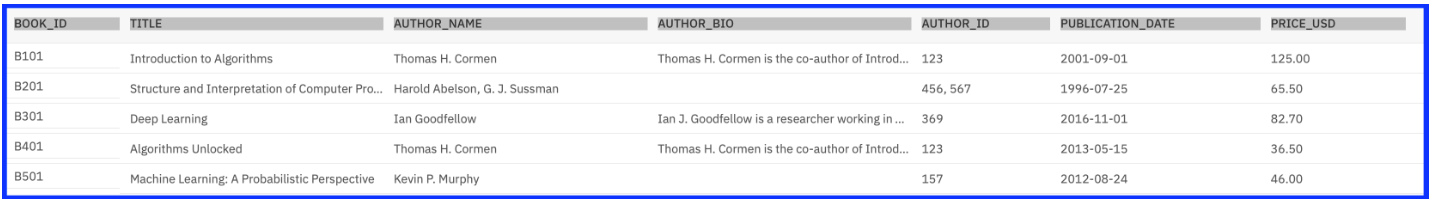

# **Task B: Second normal form (2NF)**

Download the **BookShop-CREATE-INSERT.sql** script below, copy and paste it to the Datasette lab, and run it. The script will drop any previous BookShop table that exists, create the new BookShop table, and populate it with the sample data required for this lab.

[Download Bookshop-CREATE-INSERT(2).sql](https://www.dropbox.com/scl/fik2wxgbukfbrnxkuxda9uu/BookShop-CREATE-INSERT-2.sql?rlkey=ivg13jdnzbah06okf1ckaq9nt&st=8yr0b7if&dl=1)

**Tip:** If you are unsure how to upload and run the script in Datasette, follow the given steps:

Download the script file to your computer:

[Download Bookshop-CREATE-INSERT(2).sql](https://www.dropbox.com/scl/fik2wxgbukfbrnxkuxda9uu/BookShop-CREATE-INSERT-2.sql?rlkey=ivg13jdnzbah06okf1ckaq9nt&st=8yr0b7if&dl=1)

2. Open the script file using Notepad or any text editor.
- Copy the contents of the script file and paste it in the datasette text area.

- Click on Submit query button.

- The queries get executed.

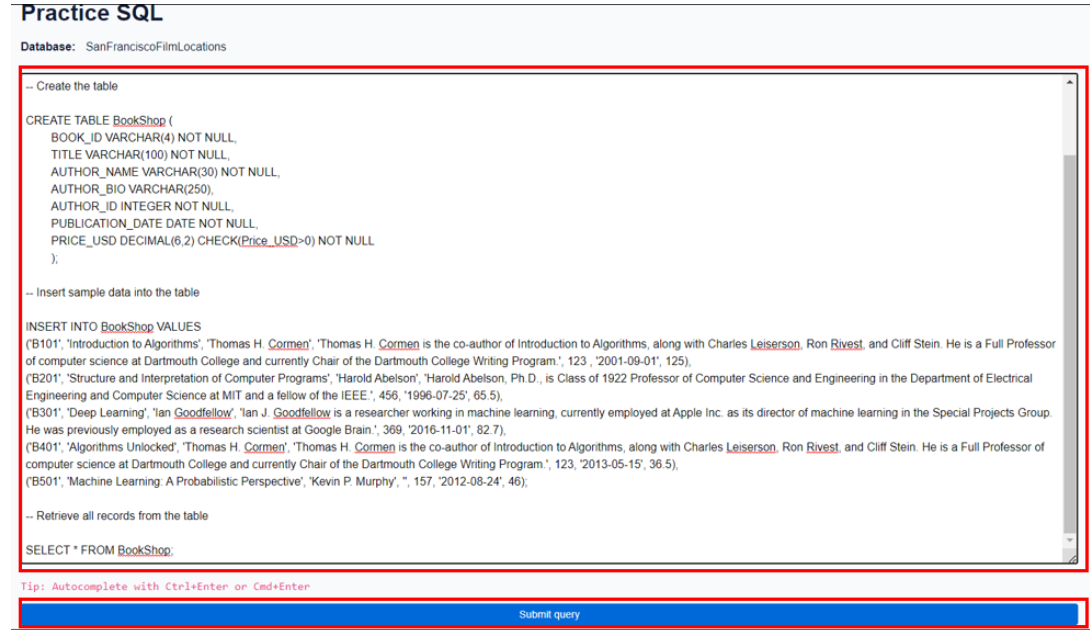

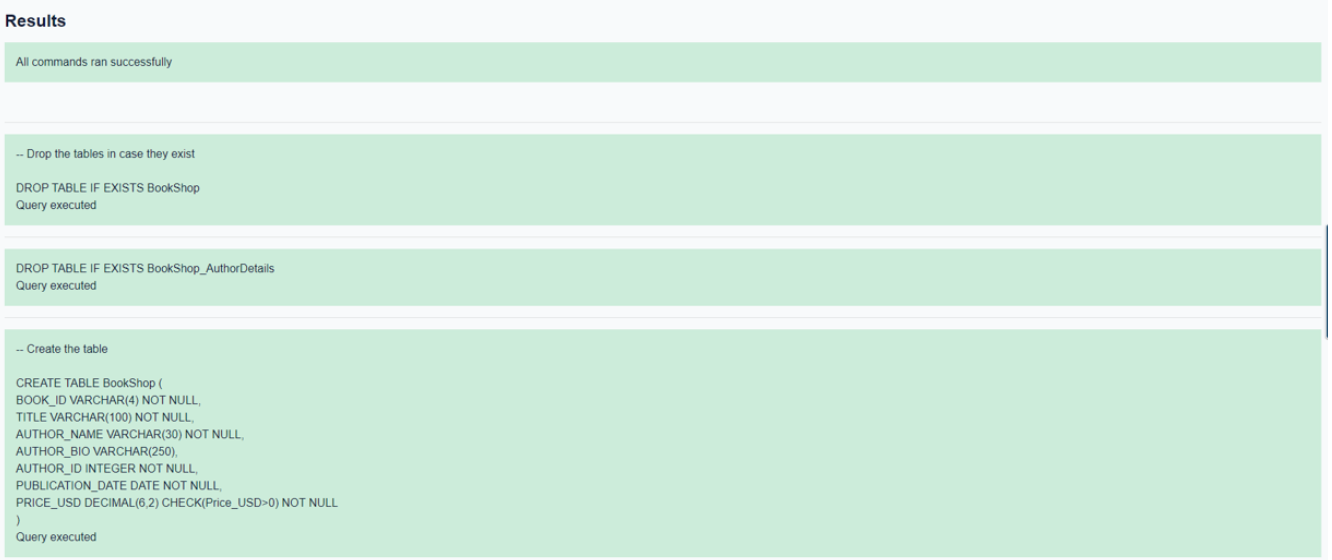

2. By definition, a relation is in second normal form if it is already in 1NF and does not contain any partial dependencies. If you look at the BookShop table, you will find every column in the table is single or atomic valued, but it has multiple books by the same author. This means that the AUTHOR_ID, AUTHOR_NAME and AUTHOR_BIO details for BOOK_ID B101 and B401 are the same. As the number of rows in the table increase, you will be needlessly storing more and more occurrences of these same pieces of information. And if an author updates their bio, you must update all of these occurrences.

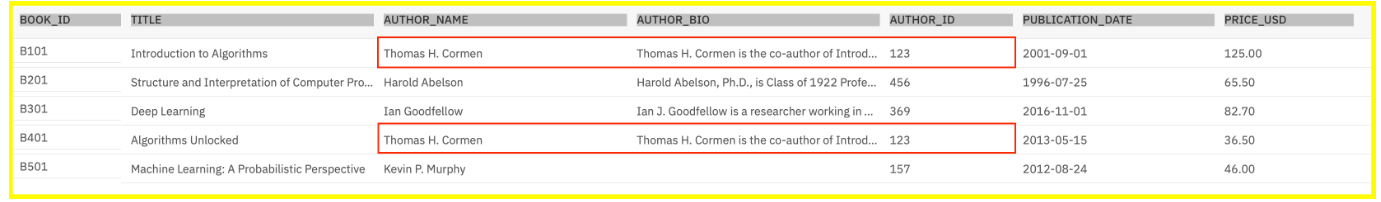

3. In this scenario, to enforce 2NF you can take the author information such as AUTHOR_ID, AUTHOR_NAME and AUTHOR_BIO out of the BookShop table into another table, for example a table named **BookShop_AuthorDetails.** You then link each book in the BookShop table to the relevant row in the BookShop_AuthorDetails table, using a unique common column such as AUTHOR_ID to link the tables. To create the new** BookShop_AuthorDetails** table, copy the code below and paste it to datasette **text area**. **Click on Submit query button.**

``` CREATE TABLE BookShop_AuthorDetails
(AUTHOR_ID INTEGER NOT NULL,AUTHOR_NAME VARCHAR(30) NOT NULL,
 AUTHOR_BIO VARCHAR(250),PRIMARY KEY (AUTHOR_ID)) ;

-----Insert the records of Bookshop to this table.

insert into BookShop_AuthorDetails select DISTINCT AUTHOR_ID, AUTHOR_NAME, AUTHOR_BIO FROM BookShop;

select * from BookShop_AuthorDetails;

```



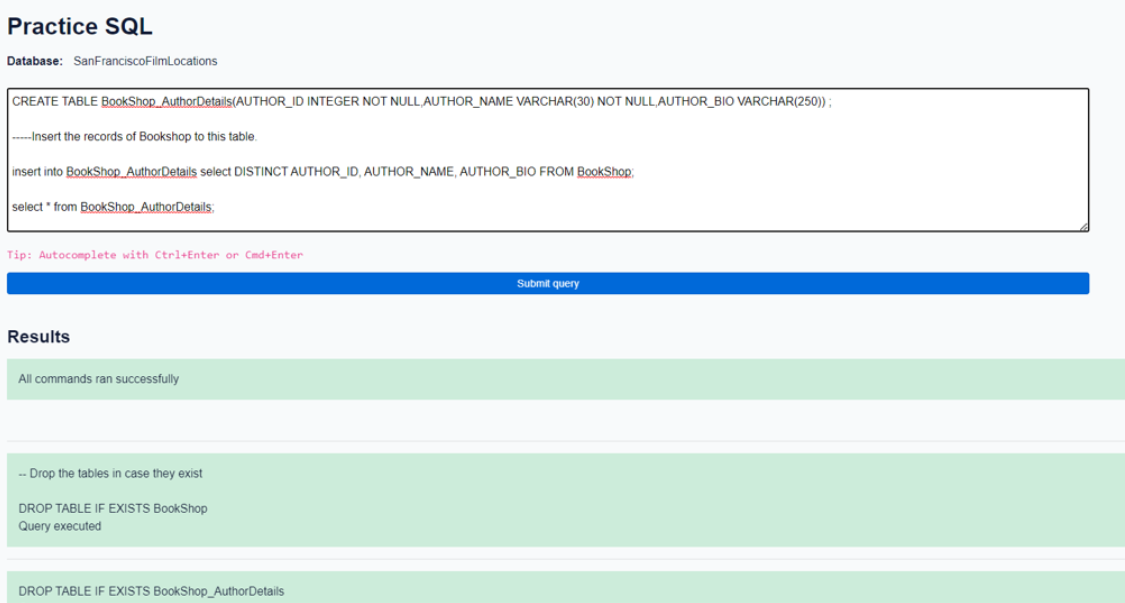

4. Now you are only storing the author information once per author and only have to update it in one place; reducing redundancy and increasing consistency of data. Thus 2NF is ensured.

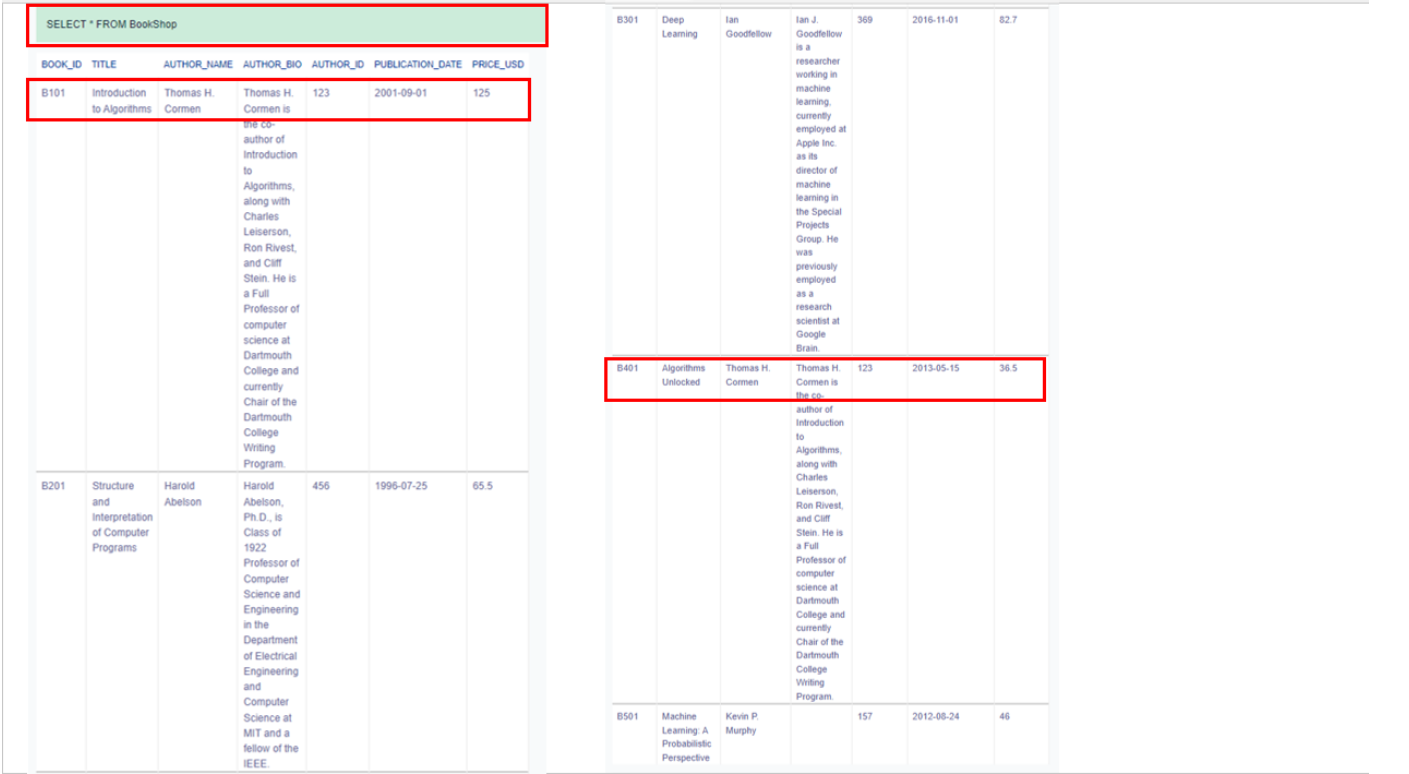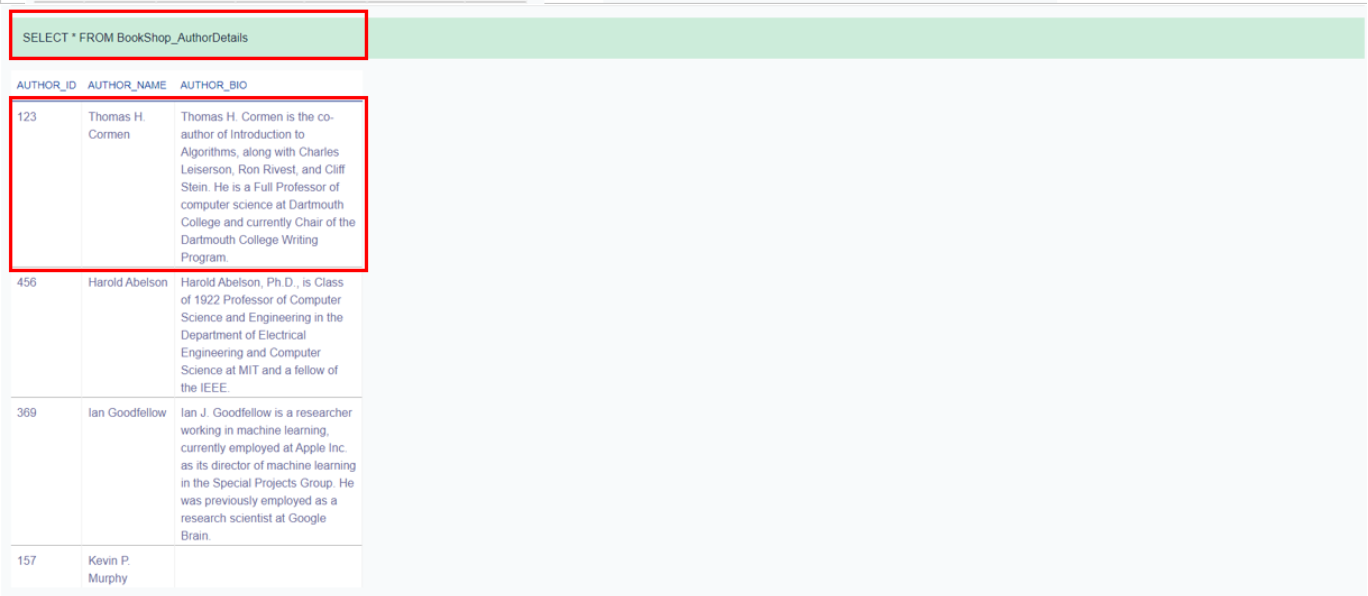

# **Exercise 2: Keys**

In this exercise, you will learn how to utilize a primary key to uniquely identify records in a table, use a foreign key to establish relationships between tables, and discern the relations between them.

# **Task A: Primary Key**

1. By definition, a primary key is a column or group of columns that uniquely identify every row in a table. A table cannot have more than one primary key. The rules for defining a primary key include:

- No two rows can have a duplicate primary key value.
- Every row must have a primary key value.
- No primary key field can be null.

2. To uniquely identify every row in the BookShop and BookShop_AuthorDetails tables, you will create a primary key. Set the BOOK_ID column of the BookShop table and the AUTHOR_ID column of the BookShop_AuthorDetails table as primary keys for their respective tables. Both columns were declared as NOT NULL when the tables were created (verify this in the SQL script or table definition). The BookShop_AuthorDetails table inherits data types and column constraints, including NOT NULL, from the BookShop parent table).

3. To set the BOOK_ID column of the BookShop table as a primary key for each of the tables, copy the code below and paste it to datasette text area. Click on Submit query button.



```--Drop the table.

DROP TABLE IF EXISTS BookShop;

-----Recreate it with Primary Key -------

CREATE TABLE BookShop (
 BOOK_ID VARCHAR(4) NOT NULL,
 TITLE VARCHAR(100) NOT NULL,
 AUTHOR_NAME VARCHAR(30) NOT NULL,
 AUTHOR_BIO VARCHAR(250),
 AUTHOR_ID INTEGER NOT NULL,
 PUBLICATION_DATE DATE NOT NULL,
 PRICE_USD DECIMAL(6,2) CHECK(Price_USD>0) NOT NULL,PRIMARY KEY (BOOK_ID));

INSERT INTO BookShop VALUES
('B101', 'Introduction to Algorithms', 'Thomas H. Cormen', 'Thomas H. Cormen is the co-author of Introduction to Algorithms, along with Charles Leiserson, Ron Rivest, and Cliff Stein. He is a Full Professor of computer science at Dartmouth College and currently Chair of the Dartmouth College Writing Program.', 123 , '2001-09-01', 125),
('B201', 'Structure and Interpretation of Computer Programs', 'Harold Abelson', 'Harold Abelson, Ph.D., is Class of 1922 Professor of Computer Science and Engineering in the Department of Electrical Engineering and Computer Science at MIT and a fellow of the IEEE.', 456, '1996-07-25', 65.5),
('B301', 'Deep Learning', 'Ian Goodfellow', 'Ian J. Goodfellow is a researcher working in machine learning, currently employed at Apple Inc. as its director of machine learning in the Special Projects Group. He was previously employed as a research scientist at Google Brain.', 369, '2016-11-01', 82.7),
('B401', 'Algorithms Unlocked', 'Thomas H. Cormen', 'Thomas H. Cormen is the co-author of Introduction to Algorithms, along with Charles Leiserson, Ron Rivest, and Cliff Stein. He is a Full Professor of computer science at Dartmouth College and currently Chair of the Dartmouth College Writing Program.', 123, '2013-05-15', 36.5),
('B501', 'Machine Learning: A Probabilistic Perspective', 'Kevin P. Murphy', '', 157, '2012-08-24', 46);

-- Retrieve all records from the table

SELECT * FROM BookShop;
```



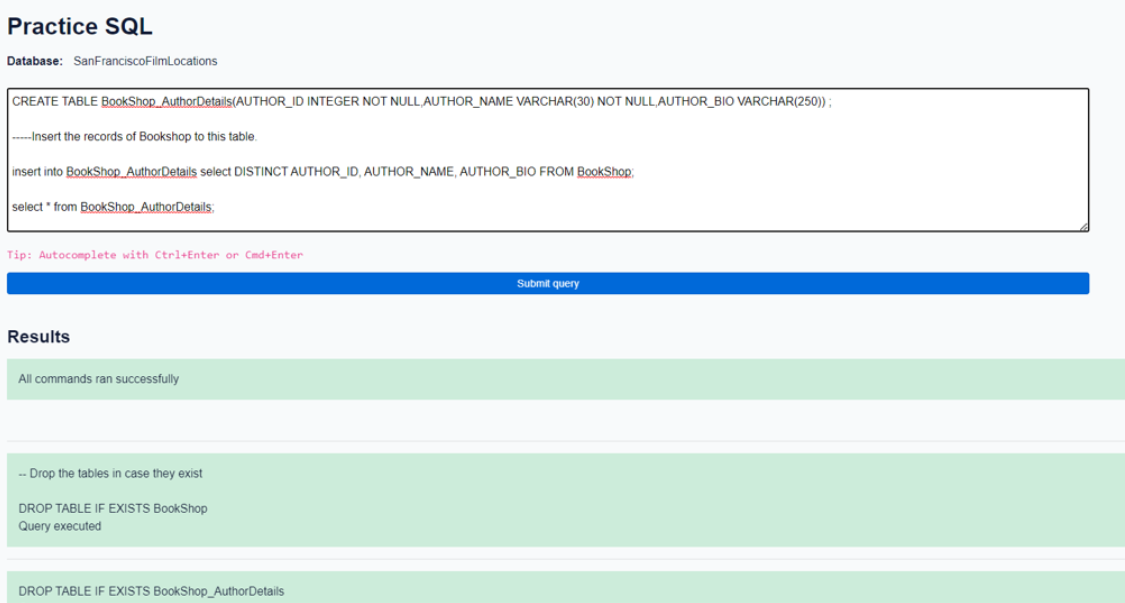

4. To set the AUTHOR_ID column of the BookShop_AuthorDetails table as a primary key for each of the tables, copy the code below and paste it to datasette text area. Click on Submit query button.


```--Drop the table.

DROP TABLE IF EXISTS BookShop_AuthorDetails;

-----Rereate another table BookShop_AuthorDetails with author id as the primary key

CREATE TABLE BookShop_AuthorDetails(AUTHOR_ID INTEGER NOT NULL,AUTHOR_NAME VARCHAR(30) NOT NULL,AUTHOR_BIO VARCHAR(250),PRIMARY KEY (AUTHOR_ID)) ;

-----Insert the records of Bookshop to this table.

insert into BookShop_AuthorDetails select DISTINCT AUTHOR_ID, AUTHOR_NAME, AUTHOR_BIO FROM BookShop;

select * from BookShop_AuthorDetails;
```



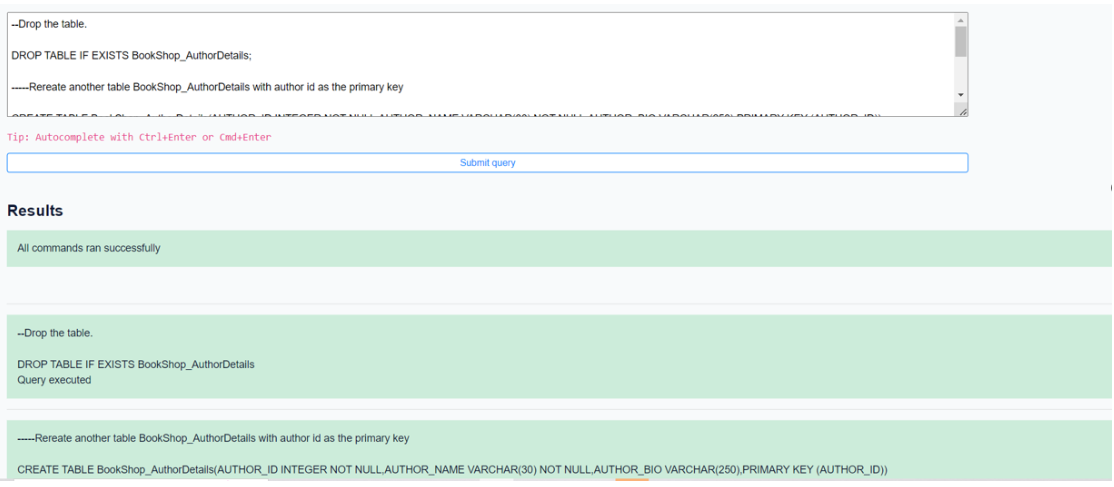

5. After adding primary key lets try add the same record in BookShop table, copy the code below and paste it to datasette text area. Click on Submit query button.



```
INSERT INTO BookShop VALUES
('B101', 'Introduction to Algorithms', 'Thomas H. Cormen', 'Thomas H. Cormen is the co-author of Introduction to Algorithms, along with Charles Leiserson, Ron Rivest, and Cliff Stein. He is a Full Professor of computer science at Dartmouth College and currently Chair of the Dartmouth College Writing Program.', 123 , '2001-09-01', 125)

---You will get unique constraint violation.

select * from BookShop;```



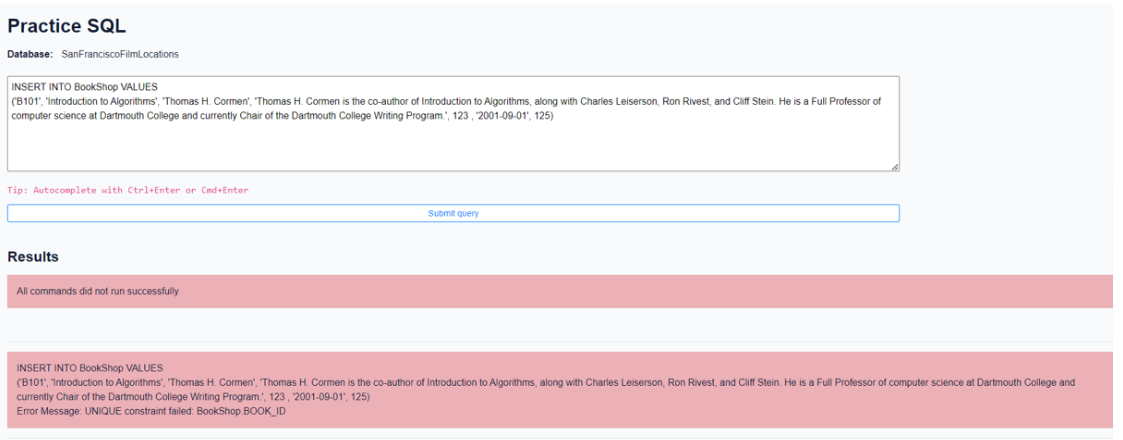

6. Now you can use the BOOK_ID column to uniquely identify every row in the BookShop table and the AUTHOR_ID column to uniquely identify every row in the BookShop_AuthorDetails table.

# **Task B: Foreign Key**

1. By definition, a foreign key is a column that establishes a relationship between two tables. It acts as a cross-reference between two tables because it points to the primary key of another table. A table can have multiple foreign keys referencing primary keys of other tables. Rules for defining a foreign key:

- A foreign key in the referencing table must match the structure and data type of the existing primary key in the referenced table.
- A foreign key can only have values present in the referenced primary key
- Foreign keys do not need to be unique. Most often they are not.
- Foreign keys can be null.

2. To create a foreign key for the BookShop table, set its AUTHOR_ID column as a foreign key, to establish a relationship between the BookShop and BookShop_AuthorDetails tables. Copy the code below and paste it to datasette text area. Click on Submit query button..



```
-----Foreign key addition in bookshop

DROP TABLE IF EXISTS BookShop;

CREATE TABLE BookShop (
 BOOK_ID VARCHAR(4) NOT NULL,
 TITLE VARCHAR(100) NOT NULL,
 AUTHOR_NAME VARCHAR(30) NOT NULL,
 AUTHOR_BIO VARCHAR(250),
 AUTHOR_ID INTEGER NOT NULL,
 PUBLICATION_DATE DATE NOT NULL,
 PRICE_USD DECIMAL(6,2) CHECK(Price_USD>0) NOT NULL,PRIMARY KEY (BOOK_ID),
FOREIGN KEY (AUTHOR_ID)
REFERENCES BookShop_AuthorDetails(AUTHOR_ID)
ON UPDATE NO ACTION
ON DELETE NO ACTION);```



``` Note: ON DELETE clause along with Foreign key is used to configure actions that takes place while deleting rows from referencing table. ON UPDATE along with the foreign key are used to take the set actions while modifying the referencing key values of existing rows.

- NO ACTIONS simply means that when a parent key is updated, modified or deleted from the database, there will be no special action taken.

- If the configured action is set to RESTRICT then the application is prohibited for deleteing and modifying a parent key where one or more chil keys are already present.

On configuring the action to SET NULL when a parent key is deleted or updated then the column of all child keys that are mapped to parent key will set to contain SQL NULL values.

- SET DEFAULT is similar to SET NULL except that the child keys columns will set to contain value as default instead of null.
```



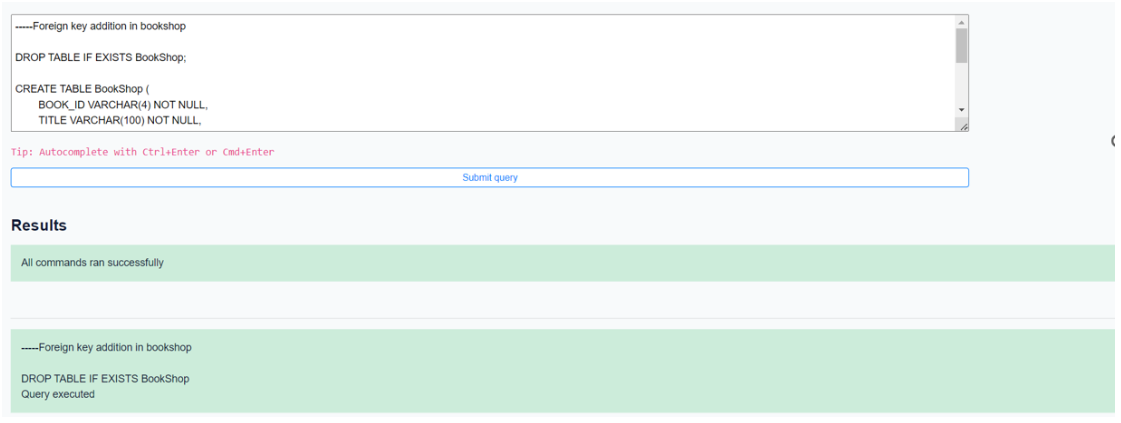

3. Now that you have created the relationship, each book in the BookShop table is linked to the relevant row in the BookShop_AuthorDetails table through AUTHOR_ID.

# **Exercise 3: Constraints**

In this exercise, you will review different kinds of relational model constraints crucial for maintaining data integrity in a relational data model.

1. **Entity Integrity Constraint:** Entity integrity ensures that no duplicate records exist within a table and that the column identifing each record within the table is not a duplicate and not null. The existence of a primary key in both the BookShop and BookShop_AuthorDetails tables satisfies this integrity constraint because a primary key mandates NOT NULL constraint as well as ensuring that every row in the table has a value that uniquely denotes the row.

2. **Referential Integrity Constraint:** Referential integrity ensures the existence of a referenced value if a value of one column of a table references a value of another column. The existence of the foreign Key (AUTHOR_ID) in the BookShop table satisfies this integrity constraint because a cross-reference relationship between the BookShop and BookShop_AuthorDetails tables exists. As a result of this relationship, each book in the BookShop table is linked to the relevant row in the BookShop_AuthorDetails table through the AUTHOR_ID columns.

3. **Domain Integrity Constraint:** Domain integrity ensures clarity of column purpose and consistency of valid values. The BookShop table adheres to this constraint through the specification of data types, length, date format, check constraints, and null constraints in its CREATE statement. This comprehensive approach guarantees that the values in each column are not only valid but also conform to the specified domain constraints.

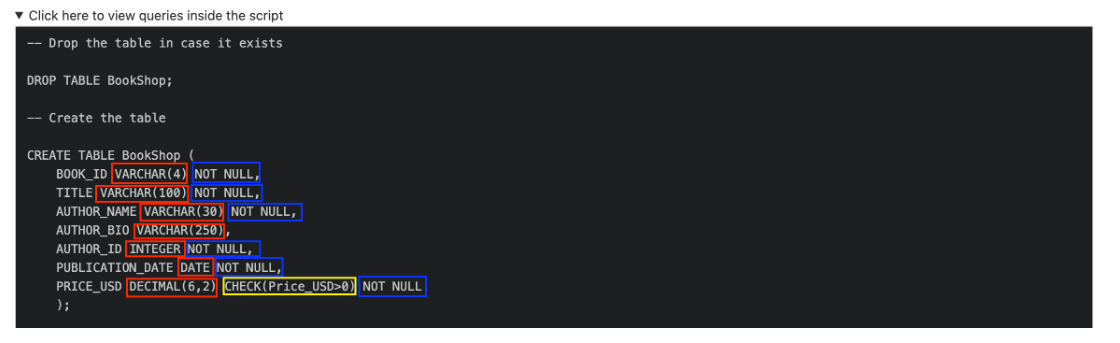

### **Congratulations! You have completed this lab.**

## **Open Source Collaboration Notice** ⚠️

- This work is open source and is released under the **Creative Commons Attribution-NonCommercial (CC BY-NC)** License.

- This project has been made possible through the contributions of **IBM Corporation**.

The lab, originally developed by **IBM**, has been recreated and further refined by **Alison Rodriguez x Technical Mindset** for educational and personal use.